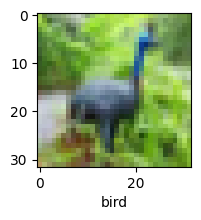

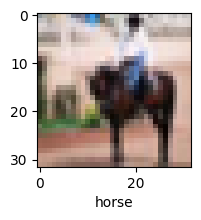

Epoch 1/5
1563/1563 [==============================] - 87s 55ms/step - loss: 1.8119 - accuracy: 0.3558
Epoch 2/5
1563/1563 [==============================] - 90s 57ms/step - loss: 1.6236 - accuracy: 0.4272
Epoch 3/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.5407 - accuracy: 0.4549
Epoch 4/5
1563/1563 [==============================] - 86s 55ms/step - loss: 1.4815 - accuracy: 0.4767
Epoch 5/5
313/313 [==============================] - 3s 10ms/step
Classification report for ANN:
               precision    recall  f1-score   support

           0       0.51      0.60      0.55      1000
           1       0.65      0.58      0.61      1000
           2       0.36      0.29      0.32      1000
           3       0.38      0.25      0.30      1000
           4       0.38      0.32      0.35      1000
           5       0.61      0.16      0.25      1000
           6       0.28      0.88      0.43      1000
           7       0.78      0.26      0.39      1000
   

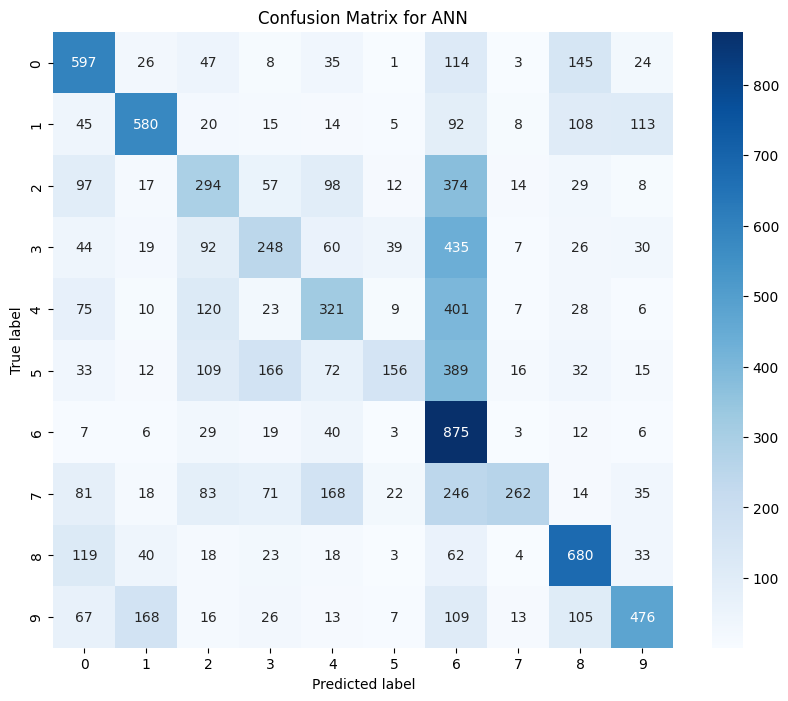

Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.5256 - accuracy: 0.4543
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2154 - accuracy: 0.5761
Epoch 3/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1007 - accuracy: 0.6161
Epoch 4/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0265 - accuracy: 0.6419
Epoch 5/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9730 - accuracy: 0.6582
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9296 - accuracy: 0.6771
Epoch 7/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8853 - accuracy: 0.6926
Epoch 8/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8538 - accuracy: 0.7039
Epoch 9/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8196 - accuracy: 0.7181
Epoch 10/10
313/313 [==============================] - 1s 4ms/st

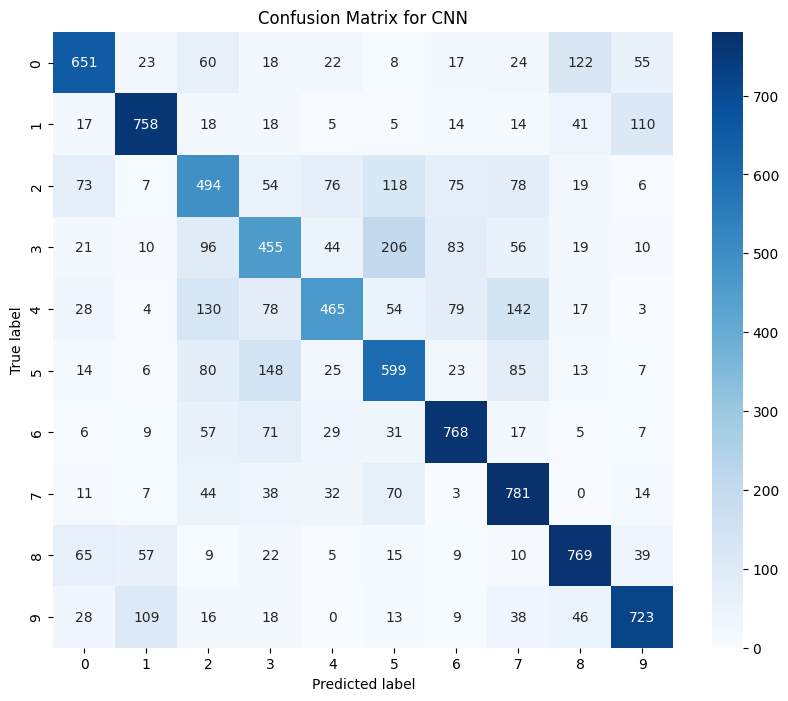

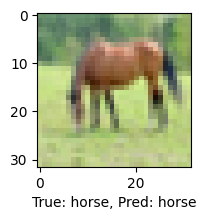

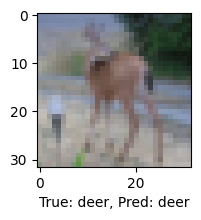

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Load the CIFAR-10 dataset
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
Y_train = Y_train.reshape(-1,)
Y_test = Y_test.reshape(-1,)

# Define the classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck']

# Function to plot sample images
def plot_sample(X, Y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])
    plt.show()

# Plot some sample images
plot_sample(X_train, Y_train, 6)
plot_sample(X_train, Y_train, 11)

# Define the ANN model
ann = models.Sequential([ 
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the ANN model
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the ANN model
ann.fit(X_train, Y_train, epochs=5)

# Evaluate the ANN model
Y_pred_ann = ann.predict(X_test)
Y_pred_classes_ann = [np.argmax(element) for element in Y_pred_ann]

# Print classification report for ANN
print('Classification report for ANN:\n', classification_report(Y_test, Y_pred_classes_ann))

# Plot confusion matrix for ANN
conf_matrix_ann = confusion_matrix(Y_test, Y_pred_classes_ann)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_ann, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for ANN')
plt.show()

# Define the CNN model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the CNN model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn.fit(X_train, Y_train, epochs=10)

# Evaluate the CNN model
cnn.evaluate(X_test, Y_test)

# Predictions for CNN
Y_pred_cnn = cnn.predict(X_test)
Y_pred_classes_cnn = [np.argmax(element) for element in Y_pred_cnn]

# Print classification report for CNN
print('Classification report for CNN:\n', classification_report(Y_test, Y_pred_classes_cnn))

# Plot confusion matrix for CNN
conf_matrix_cnn = confusion_matrix(Y_test, Y_pred_classes_cnn)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for CNN')
plt.show()

# Plot sample images with predictions
def plot_sample_with_prediction(X, Y_true, Y_pred, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(f"True: {classes[Y_true[index]]}, Pred: {classes[Y_pred[index]]}")
    plt.show()

plot_sample_with_prediction(X_test, Y_test, Y_pred_classes_cnn, 60)
plot_sample_with_prediction(X_test, Y_test, Y_pred_classes_cnn, 100)


In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Load CIFAR-10 dataset
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


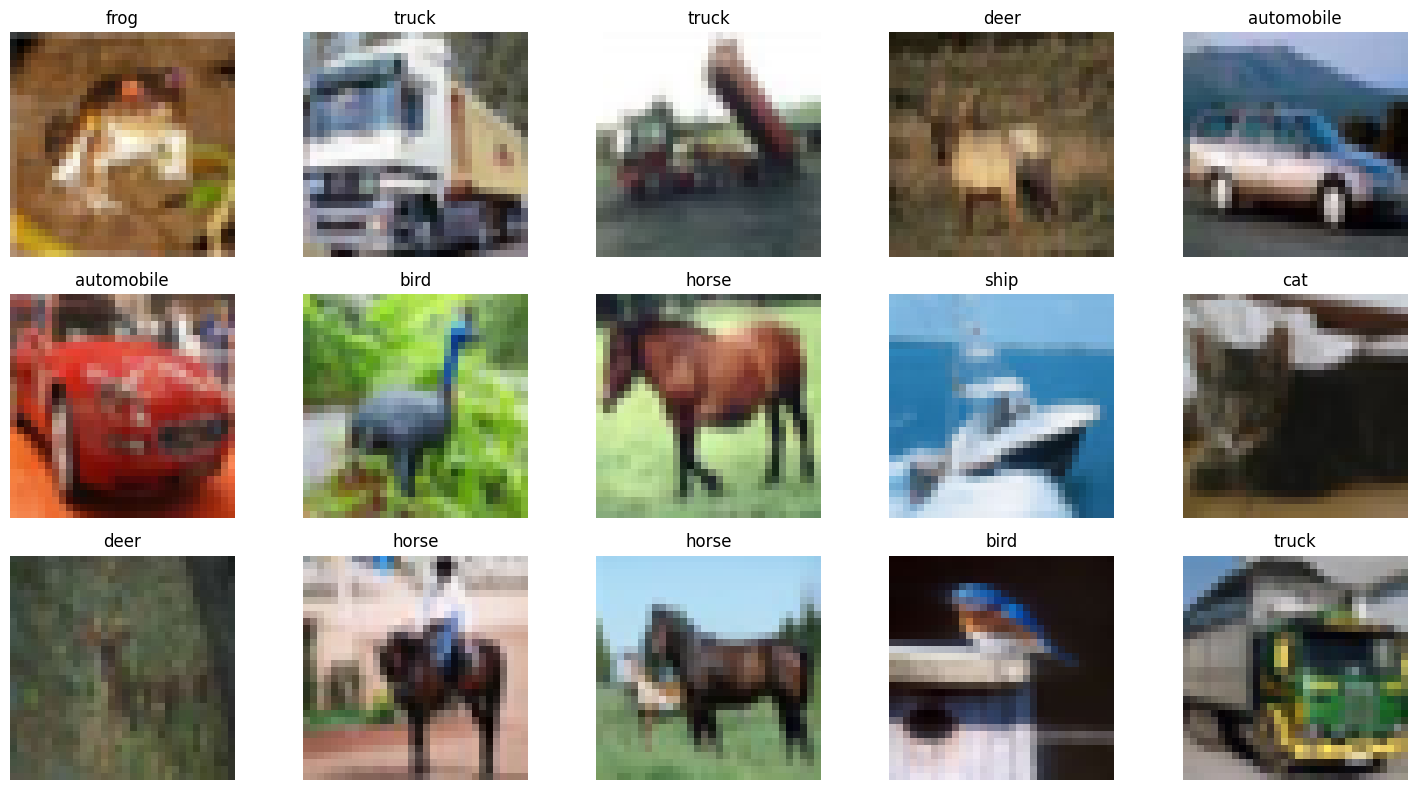

In [2]:
def plot_sample_images(images, labels, class_names, rows=3, cols=5):
    plt.figure(figsize=(15, 8))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display sample images from training data
plot_sample_images(X_train, Y_train, class_names)


In [3]:
def build_ann_model(input_shape):
    model = models.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='SGD',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train ANN model
ann_model = build_ann_model(X_train.shape[1:])
ann_history = ann_model.fit(X_train, Y_train, epochs=5, verbose=1)


Epoch 1/5
1563/1563 [==============================] - 79s 50ms/step - loss: 1.8112 - accuracy: 0.3552
Epoch 2/5
1563/1563 [==============================] - 76s 48ms/step - loss: 1.6219 - accuracy: 0.4276
Epoch 3/5
1563/1563 [==============================] - 84s 54ms/step - loss: 1.5386 - accuracy: 0.4576
Epoch 4/5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.4790 - accuracy: 0.4760
Epoch 5/5
1563/1563 [==============================] - 76s 49ms/step - loss: 1.4309 - accuracy: 0.4976


ANN Test Accuracy: 0.4866
313/313 [==============================] - 2s 8ms/step


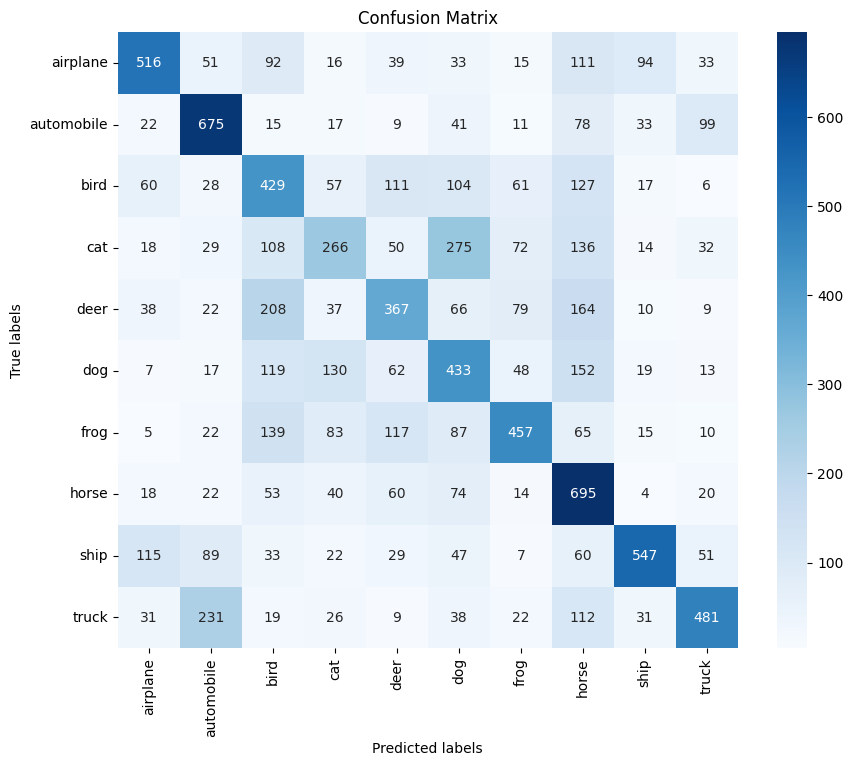

In [4]:
# Evaluate ANN model
ann_loss, ann_accuracy = ann_model.evaluate(X_test, Y_test, verbose=0)
print(f'ANN Test Accuracy: {ann_accuracy:.4f}')

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix for ANN
Y_pred_ann = np.argmax(ann_model.predict(X_test), axis=-1)
plot_confusion_matrix(Y_test, Y_pred_ann, class_names)


In [ ]:
def build_cnn_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train CNN model
cnn_model = build_cnn_model(X_train.shape[1:])
cnn_history = cnn_model.fit(X_train, Y_train, epochs=10, verbose=1)


Epoch 1/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4880 - accuracy: 0.4700
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.1803 - accuracy: 0.5872
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0637 - accuracy: 0.6288
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9891 - accuracy: 0.6562
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9232 - accuracy: 0.6787
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8675 - accuracy: 0.7001
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8194 - accuracy: 0.7150
Epoch 8/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7771 - accuracy: 0.7281
Epoch 9/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7384 - accuracy: 0.7423
Epoch 10/10
 261/1563 [====>.........................] - ETA: 17

In [ ]:
# Evaluate CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, Y_test, verbose=0)
print(f'CNN Test Accuracy: {cnn_accuracy:.4f}')

# Plot confusion matrix for CNN
Y_pred_cnn = np.argmax(cnn_model.predict(X_test), axis=-1)
plot_confusion_matrix(Y_test, Y_pred_cnn, class_names)


In [ ]:
# Function to display sample images with predictions
def plot_sample_predictions(images, labels_true, labels_pred, class_names, rows=2, cols=5):
    plt.figure(figsize=(15, 6))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {class_names[labels_true[i][0]]}\nPred: {class_names[labels_pred[i]]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display sample images with predictions from CNN
plot_sample_predictions(X_test, Y_test, Y_pred_cnn, class_names)
